### Projeto 1 de Visão Computacional - Thiago Matheus de Oliveria Costa(8101)
---

* Import das bibliotecas Utilizadas no projeto.


In [162]:
import os
import numpy as py
import cv2
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from collections import Counter
from skimage import util, transform, filters, color, measure, morphology
from sklearn import svm, model_selection, neighbors, metrics, preprocessing, neural_network
print("Imports completed")

Imports completed


* Carregando o Dataset original.


In [163]:
numImages = 0
originalImagesPlot = []
classes = []
labels = {}
datasetPath = r"D:\Downloads\UFV - Visao Computacional\Projeto 1\DataSet"

# Carregar imagens do dataset
for folder in os.listdir(datasetPath):
    n = 0
    classes.append(folder)
    labels[folder] = []
    folderPath = os.path.join(datasetPath, folder)
    for imageFile in os.listdir(folderPath):
        fullPath = os.path.join(folderPath, imageFile)
        if fullPath.lower().endswith(('.png', '.jpg', '.jpeg')):  # Verificar extensões
            loadImage = cv2.imread(fullPath, cv2.IMREAD_GRAYSCALE)
            if loadImage is not None:
                labels[folder].append(loadImage)
                numImages += 1
                if n < 3:
                    originalImagesPlot.append(loadImage)
                    n += 1
            else:
                print(f"Erro ao carregar a imagem: {fullPath}")

# Exibir resultados do carregamento
print(f'Images loaded: {numImages}')
print(f"Classes detected: {classes}")
for folder, images in labels.items():
    print(f"Classe '{folder}': {len(images)} imagens carregadas")


Images loaded: 600
Classes detected: ['apple', 'bat', 'beetle', 'bell', 'bird', 'bone']
Classe 'apple': 100 imagens carregadas
Classe 'bat': 100 imagens carregadas
Classe 'beetle': 100 imagens carregadas
Classe 'bell': 100 imagens carregadas
Classe 'bird': 100 imagens carregadas
Classe 'bone': 100 imagens carregadas


* Plotando as imagens originais.

0 - Classe: apple
1 - Classe: bat
2 - Classe: beetle
3 - Classe: bell
4 - Classe: bird
5 - Classe: bone


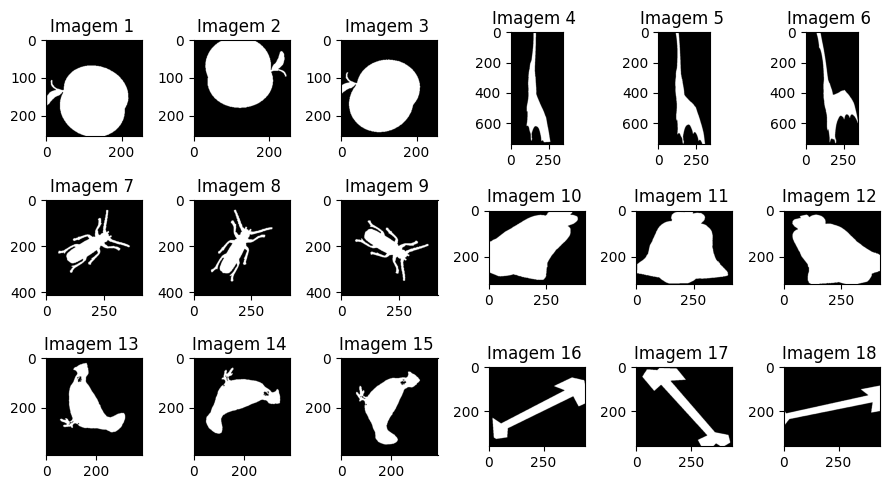

In [164]:
for n, c in enumerate(classes):
    print(f"{n} - Classe: {c}")

fig, ax = plt.subplots(3, 6, figsize=(9, 5))

n = 0
for i, image in enumerate(originalImagesPlot):
    ax[i//6, i%6].imshow(image, cmap='gray',vmin=0, vmax=255)
    n += 1
    ax[i//6, i%6].set_title(str(f"Imagem {n} "))

fig.tight_layout()
plt.show()
    


* Criação de uma pasta para guardar os resultados das segmentação(opcional).

In [165]:
#outputFolder = r"D:\Downloads\UFV - Visao Computacional\Projeto 1\SegmentationResult"
#os.makedirs(outputFolder, exist_ok=True)
#print("Folder Created")

* Processo de segmentação e criação das folders para cada classe(com a criação das pastas de cada imagem).

In [166]:
#totalImages = 0
#imagePlot = []
#for c in classes:
#    numImagesPlot = 0
#    classOutputFolder = os.path.join(outputFolder, c)
#    os.makedirs(classOutputFolder, exist_ok=True)
#    for n, i in enumerate(labels[c]):
#        contornos, _ = cv2.findContours(i, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#        for contorno in contornos:
#            x, y, w, h = cv2.boundingRect(contorno)
#            roi = i[y:y+h, x:x+w]
#            if numImagesPlot < 3: 
#                imagePlot.append(roi)
#                numImagesPlot += 1
#            output_path = os.path.join(classOutputFolder, f"Image{n + 1}.png")
#            cv2.imwrite(output_path, roi)
#            totalImages += 1

#print(f"Total Images from the segmentation process = {totalImages}")

* Segmentando as imagens sem a criação das pastas.

In [167]:
totalImages = 0
imagePlot = []
segmentedImages = {}
for c in classes:
    segmentedImages[c] = []
    numImagesPlot = 0
    for i in labels[c]:
        contornos, _ = cv2.findContours(i, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        for contorno in contornos:
            x, y, w, h = cv2.boundingRect(contorno)
            roi = i[y:y+h, x:x+w]
            segmentedImages[c].append(roi)
            if numImagesPlot < 3:
                imagePlot.append(roi)
                numImagesPlot += 1
            totalImages += 1

print(f"Total Images from the segmentation process = {totalImages}")

Total Images from the segmentation process = 600


* Plotando as Imagens segmentadas

0 - Classe: apple
1 - Classe: bat
2 - Classe: beetle
3 - Classe: bell
4 - Classe: bird
5 - Classe: bone


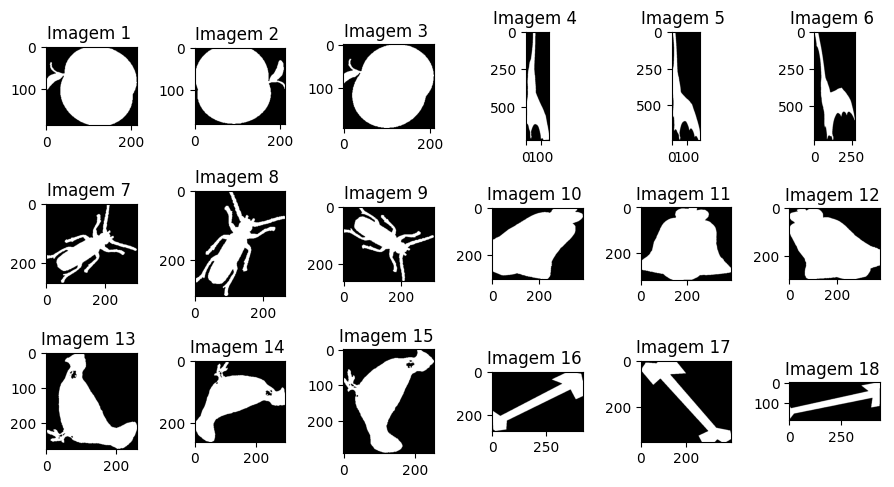

In [168]:
for n, c in enumerate(classes):
    print(f"{n} - Classe: {c}")

fig, ax = plt.subplots(3, 6, figsize=(9, 5))

n = 0
for i, image in enumerate(imagePlot):
    ax[i//6, i%6].imshow(image, cmap='gray',vmin=0, vmax=255)
    n += 1
    ax[i//6, i%6].set_title(str(f"Imagem {n} "))

fig.tight_layout()
plt.show()
    


* Processo de extração de features das imagens


In [169]:
matrizDeCaracteristicas = []
rotulos = []
feature = ["Área", "Circularidade", "Excentricidade", "Perimetro", "MajorAxis", "MinorAxis"]

for label, img in segmentedImages.items():
    for img_bin in img:
        imagensRotuladas = measure.label(img_bin)

        props = measure.regionprops(imagensRotuladas)

        prop = props[0]

        area = prop.area
        circularidade = 4 * py.pi * (area/(prop.perimeter**2)) if prop.perimeter > 0 else 0
        excentricidade = prop.eccentricity
        perimetro = prop.perimeter
        majorAxis = getattr(prop, "major_axis_length", 0)
        minorAxis = getattr(prop, "minor_axis_length", 0)

        feature_list = [area, circularidade, excentricidade, perimetro, majorAxis, minorAxis]
        matrizDeCaracteristicas.append(feature_list)
        rotulos.append(label)

mapaDeCaracteristicas = py.array(matrizDeCaracteristicas)


df = pd.DataFrame(mapaDeCaracteristicas, columns=feature)
df['class'] = rotulos
display(df)

with py.printoptions(precision=4, suppress=True):
    print(f"Min de cada caracteristica: {mapaDeCaracteristicas.min(0)}")
    print(f"Max de cada caracteristica: {mapaDeCaracteristicas.max(0)}")
    print(f"Media de cada caracteristica: {mapaDeCaracteristicas.mean(0)}")
    print(f"Desvio padrão de cada caracteristica: {mapaDeCaracteristicas.std(0)}")

,Área,Circularidade,Excentricidade,Perimetro,MajorAxis,MinorAxis,class
0,27835.0,0.534246,0.274615,809.151370,194.349521,186.877616,apple
1,27660.0,0.526804,0.310852,812.281313,195.350643,185.672670,apple
2,27932.0,0.545216,0.501337,802.364574,204.641108,177.066138,apple
3,27962.0,0.534758,0.290071,810.607214,195.347203,186.948258,apple
4,27895.0,0.553741,0.362738,795.636652,197.328364,183.888540,apple
...,...,...,...,...,...,...,...
595,25743.0,0.178869,0.974055,1344.829653,533.052276,120.635304,bone
596,23239.0,0.137411,0.989182,1457.816413,610.888494,89.615314,bone
597,23736.0,0.183300,0.966389,1275.636652,481.020585,123.662232,bone
598,24817.0,0.177209,0.973712,1326.591017,525.275817,119.648907,bone


Min de cada caracteristica: [1623.        0.0391    0.073   169.8823   59.6027   27.4908]
Max de cada caracteristica: [105287.          0.7548      0.9985   4343.2076    835.3069    393.9027]
Media de cada caracteristica: [32947.095      0.3169     0.7939  1306.2805   360.157    154.7733]
Desvio padrão de cada caracteristica: [23293.3089     0.2008     0.1998   661.3645   180.4117    66.5156]


* Plotando as features extraidas.


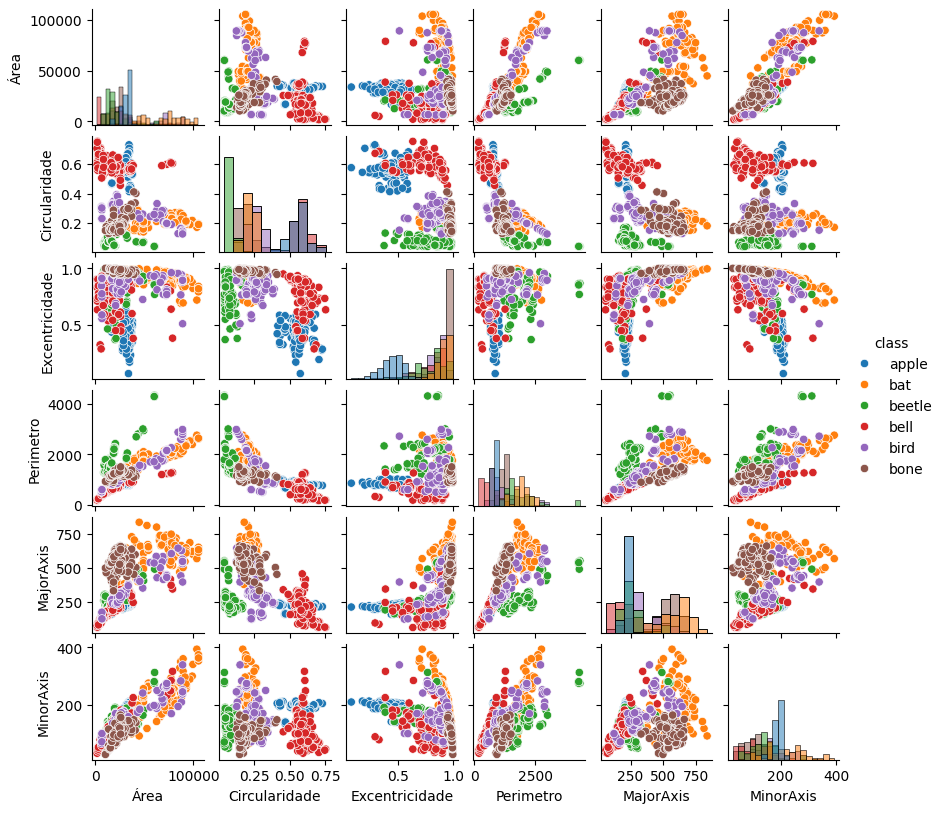

In [170]:
g = sns.PairGrid(df, hue='class', vars=feature)
g.fig.set_size_inches(8, 8)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()


* Separando o Dataset em treino, validação e teste.

In [171]:
X_train, X_test, y_train, y_teste = model_selection.train_test_split(matrizDeCaracteristicas,
                                                                    rotulos,
                                                                    test_size=0.3,
                                                                    stratify=rotulos,
                                                                    random_state = 42)

X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train,
                                                y_train,
                                                test_size=0.2,
                                                stratify=y_train,
                                                random_state=42)

print(f"Tamanho do conjunto de treino: {len(X_train)}")
print(f"Tamanho do conjunto de validação: {len(X_val)}")
print(f"Tamanho do conjunto de teste: {len(X_test)}")

print("\nDistribuição de classes:")
print(f"Treino: {Counter(y_train)}")
print(f"Validação: {Counter(y_val)}")
print(f"Teste: {Counter(y_teste)}")

Tamanho do conjunto de treino: 336
Tamanho do conjunto de validação: 84
Tamanho do conjunto de teste: 180

Distribuição de classes:
Treino: Counter({'beetle': 56, 'bell': 56, 'bone': 56, 'bird': 56, 'bat': 56, 'apple': 56})
Validação: Counter({'bird': 14, 'bone': 14, 'bell': 14, 'bat': 14, 'apple': 14, 'beetle': 14})
Teste: Counter({'bird': 30, 'beetle': 30, 'bell': 30, 'bone': 30, 'bat': 30, 'apple': 30})


### Normalização de Caracteristicas

* Transformação de lista para numpy.ndarray.
    * Calculando a Media e desvio padrão para o conjunto de treino.

In [172]:
X_train = py.array(X_train)
X_val = py.array(X_val)
X_test = py.array(X_test)

X_train_media = X_train.mean(0)
X_train_desvio = X_train.std(0)

with py.printoptions(precision=4, suppress=True):
    print(f"Media do conjunto de treino: {X_train_media}")
    print(f"Desvio padrão do conjunto de treino: {X_train_desvio}")

Media do conjunto de treino: [33423.8571     0.317      0.792   1299.2288   360.023    155.3389]
Desvio padrão do conjunto de treino: [23510.0155     0.1995     0.2029   620.1368   180.4055    64.8089]


* Realizando a transformada normal de caracteristicas 

In [173]:
#Manualmente
#X_train_norm = (X_train - X_train_media) / X_train_desvio
#X_val_norm = (X_val - X_train_media) / X_train_desvio
#X_test_norm = (X_test - X_train_media) / X_train_desvio

#Utilizando o Sklearn
scaler = preprocessing.StandardScaler().fit(X_train)
with py.printoptions(precision=4, suppress=True):
    print(f'Média:  \t {py.array(scaler.mean_)}')
    print(f'Desv. pad.: \t {py.array(scaler.scale_)}')

X_train_norm = scaler.transform(X_train)
X_val_norm = scaler.transform(X_val)
X_test_norm = scaler.transform(X_test)

with py.printoptions(precision=4, suppress=True):
    print("\nResultado da transformada:")
    print(f'Treino: \t {X_train_norm.mean():.4f} ± {X_train_norm.std():.4f}')
    print(f'Validação: \t {X_val_norm.mean():.4f} ± {X_val_norm.std():.4f}')
    print(f'Teste:   \t {X_test_norm.mean():.4f} ± {X_test_norm.std():.4f}')

Média:  	 [33423.8571     0.317      0.792   1299.2288   360.023    155.3389]
Desv. pad.: 	 [23510.0155     0.1995     0.2029   620.1368   180.4055    64.8089]

Resultado da transformada:
Treino: 	 -0.0000 ± 1.0000
Validação: 	 0.0069 ± 1.0734
Teste:   	 -0.0076 ± 1.0079


### Classificação Utilizando o K-nn Vizinhos

In [174]:
melhorK = None
possiveisK = [1, 3, 5, 7, 9]
melhorAcuracia = 0
acc_train_list = []
acc_val_list = []

for k in possiveisK:
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train_norm, y_train)
    pred = clf.predict(X_val_norm)
    valAcuracia = metrics.accuracy_score(y_val, pred)

    acc_val_list.append(valAcuracia)

    #Testando o classificador com o conjunto de treino)
    #Somente para a comparação dos resultados
    pred_train = clf.predict(X_train_norm)
    valAcuraciaTreino = metrics.accuracy_score(y_train, pred_train)
    acc_train_list.append(valAcuraciaTreino)

    print(f"K = {k}, Validação Accuracy = {valAcuracia:.2f}")

    if valAcuracia > melhorAcuracia:
        melhorK = k
        melhorAcuracia = valAcuracia

print(f"Melhor K encontrado na validação: {melhorK}, com acurácia = {melhorAcuracia:.2f}")

K = 1, Validação Accuracy = 0.96
K = 3, Validação Accuracy = 0.92
K = 5, Validação Accuracy = 0.89
K = 7, Validação Accuracy = 0.89
K = 9, Validação Accuracy = 0.88
Melhor K encontrado na validação: 1, com acurácia = 0.96


### Plotando o Grafico do treinamento

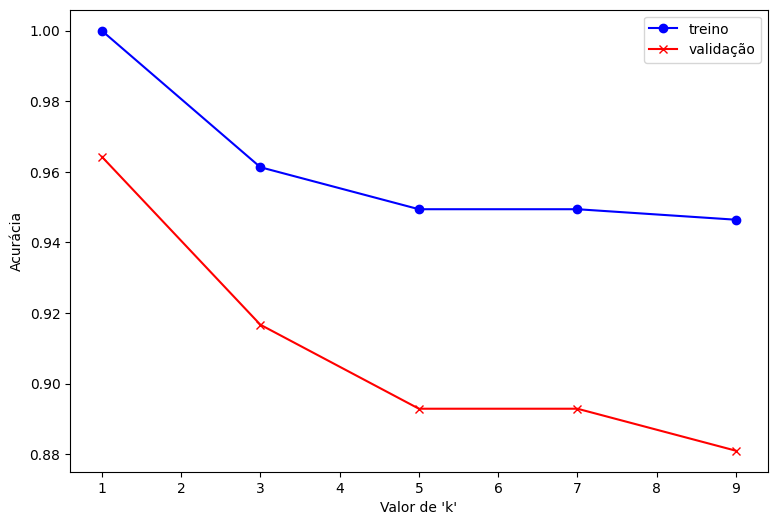

In [175]:
plt.figure(figsize=(9, 6))

plt.plot(possiveisK, acc_train_list, '-o', color='blue', label='treino')
plt.plot(possiveisK, acc_val_list, '-x', color='red', label='validação')
plt.xlabel("Valor de 'k'")
plt.ylabel("Acurácia")
plt.legend(loc='best')

plt.show()

In [176]:
print('k \t acc. treino \t acc. val')
print('----------------------------')
for k_, acc_t, acc_v in zip(possiveisK, acc_train_list, acc_val_list):
    print(f'{k_} \t {acc_t:.4f} \t {acc_v:.4f}')

k_best = possiveisK[py.argmax(acc_val_list)]
print(f'\nMelhor \'k\': {k_best} ({py.max(acc_val_list):.4f} acc.)')

k 	 acc. treino 	 acc. val
----------------------------
1 	 1.0000 	 0.9643
3 	 0.9613 	 0.9167
5 	 0.9494 	 0.8929
7 	 0.9494 	 0.8929
9 	 0.9464 	 0.8810

Melhor 'k': 1 (0.9643 acc.)


### Testando o melhor K com o conjunto de testes


In [177]:
clf = neighbors.KNeighborsClassifier(n_neighbors=melhorK)
clf.fit(X_train_norm, y_train)

test_pred = clf.predict(X_test_norm)
valAcuracia_Test = metrics.accuracy_score(y_teste, test_pred)

print(f"\nAcurácia no conjunto de teste: {valAcuracia_Test:.2f}")


Acurácia no conjunto de teste: 0.94


### Avaliando o Modelo de forma mais visivel.

In [178]:
y_teste = py.array(y_teste)
test_pred = py.array(test_pred)
acertos = y_teste == test_pred

print('\n Predição:')
print(test_pred)
print('\nReal:')
print(y_teste)
print('\nAcerto/Erro:')
print(acertos.astype(int))


 Predição:
['bird' 'beetle' 'bell' 'bone' 'bat' 'apple' 'bell' 'beetle' 'bell'
 'beetle' 'bat' 'bat' 'bat' 'bone' 'apple' 'bone' 'bird' 'bell' 'bell'
 'beetle' 'bat' 'bone' 'apple' 'beetle' 'bell' 'bone' 'bell' 'beetle'
 'apple' 'bone' 'bell' 'bone' 'beetle' 'beetle' 'bird' 'bird' 'beetle'
 'bell' 'apple' 'bell' 'apple' 'bell' 'bird' 'bat' 'bell' 'bat' 'beetle'
 'apple' 'bat' 'bell' 'apple' 'bell' 'bone' 'bird' 'apple' 'apple' 'apple'
 'bell' 'beetle' 'bird' 'apple' 'bell' 'beetle' 'bat' 'beetle' 'bird'
 'beetle' 'bat' 'bell' 'bone' 'bell' 'bell' 'bird' 'bell' 'bat' 'beetle'
 'bone' 'beetle' 'bat' 'bat' 'bird' 'apple' 'bell' 'apple' 'bell' 'bone'
 'bird' 'bat' 'bone' 'beetle' 'bell' 'bat' 'apple' 'bone' 'bell' 'bird'
 'bat' 'bird' 'bone' 'bell' 'bird' 'bird' 'bat' 'bird' 'bone' 'bone'
 'beetle' 'beetle' 'bird' 'apple' 'bat' 'apple' 'apple' 'bat' 'beetle'
 'bone' 'bone' 'bone' 'apple' 'bird' 'bone' 'bird' 'apple' 'apple'
 'beetle' 'apple' 'bat' 'apple' 'bat' 'bell' 'bell' 'bird' 'beetl

### Matriz de Confusão e o relatório de treinamento

In [179]:
print('\nMatriz de confusão:')
print(metrics.confusion_matrix(y_teste, test_pred))

print('\nRelatório de classificação:')
print(metrics.classification_report(y_teste, test_pred))


Matriz de confusão:
[[26  0  0  4  0  0]
 [ 0 27  0  0  0  3]
 [ 0  0 30  0  0  0]
 [ 1  0  0 29  0  0]
 [ 0  1  0  0 29  0]
 [ 0  1  0  0  1 28]]

Relatório de classificação:
              precision    recall  f1-score   support

       apple       0.96      0.87      0.91        30
         bat       0.93      0.90      0.92        30
      beetle       1.00      1.00      1.00        30
        bell       0.88      0.97      0.92        30
        bird       0.97      0.97      0.97        30
        bone       0.90      0.93      0.92        30

    accuracy                           0.94       180
   macro avg       0.94      0.94      0.94       180
weighted avg       0.94      0.94      0.94       180



### Classificação utilizando o Multilayer Perceptron(MLP).

* Treinando o modelo com o dados do treino e validação

In [180]:
mlp = neural_network.MLPClassifier(hidden_layer_sizes=(10,10),
                                activation='relu',
                                solver = 'adam',
                                max_iter=500,
                                alpha=0.0001,
                                learning_rate_init=0.01,
                                random_state=42)

mlp.fit(X_train_norm, y_train)

val_acuracia = mlp.score(X_val_norm, y_val)
print(f"Acurácia no conjunto de validação: {val_acuracia:.2f}")

Acurácia no conjunto de validação: 0.99


* Avaliando o modelo treinado com o conjunto de teste

In [181]:
test_predict = mlp.predict(X_test_norm)

test_acuracia = mlp.score(X_test_norm, y_teste)
print(f"Acurácia no conjunto de teste: {test_acuracia:.2f}")

Acurácia no conjunto de teste: 0.95


* Relatorios de metricas

In [182]:
print("Metricas:\n")
print(metrics.classification_report(y_teste, test_predict))
print("Matriz de Confusão: \n")
print(metrics.confusion_matrix(y_teste  , test_predict))
print(f"\nAcurácia no conjunto de teste: {test_acuracia:.2f}")


Metricas:

              precision    recall  f1-score   support

       apple       0.94      0.97      0.95        30
         bat       0.93      0.90      0.92        30
      beetle       1.00      1.00      1.00        30
        bell       0.97      0.93      0.95        30
        bird       0.97      0.97      0.97        30
        bone       0.90      0.93      0.92        30

    accuracy                           0.95       180
   macro avg       0.95      0.95      0.95       180
weighted avg       0.95      0.95      0.95       180

Matriz de Confusão: 

[[29  0  0  1  0  0]
 [ 0 27  0  0  0  3]
 [ 0  0 30  0  0  0]
 [ 2  0  0 28  0  0]
 [ 0  1  0  0 29  0]
 [ 0  1  0  0  1 28]]

Acurácia no conjunto de teste: 0.95


### Classificação Utilizando o SVM(Support Vector Machine)
--- 

* Sem a utilização do grid-search

In [183]:
modelo = svm.SVC(kernel='rbf', C=1.0, gamma='scale')

modelo.fit(X_train_norm, y_train)
val_pred = modelo.predict(X_val_norm)

print(f"Acurácia no conjunto de validação: {metrics.accuracy_score(y_val, val_pred):.2f}")

Acurácia no conjunto de validação: 0.92


### Classificando no conjunto de teste

In [184]:
test_predict = modelo.predict(X_test_norm)
acuraciaTest = modelo.score(X_test_norm, y_teste)
print(f"Acurácia no conjunto de teste: {acuraciaTest:.2f}")

Acurácia no conjunto de teste: 0.91


* Metricas para avaliação

In [185]:
print("Metricas:\n")
print(metrics.classification_report(y_teste, test_predict))
print("Matriz de Confusão: \n")
print(metrics.confusion_matrix(y_teste , test_predict))
print(f"\nAcurácia no conjunto de teste: {acuraciaTest:.2f}")

Metricas:

              precision    recall  f1-score   support

       apple       0.88      0.97      0.92        30
         bat       0.88      0.73      0.80        30
      beetle       1.00      1.00      1.00        30
        bell       0.96      0.87      0.91        30
        bird       0.84      0.90      0.87        30
        bone       0.88      0.97      0.92        30

    accuracy                           0.91       180
   macro avg       0.91      0.91      0.90       180
weighted avg       0.91      0.91      0.90       180

Matriz de Confusão: 

[[29  0  0  1  0  0]
 [ 0 22  0  0  4  4]
 [ 0  0 30  0  0  0]
 [ 4  0  0 26  0  0]
 [ 0  3  0  0 27  0]
 [ 0  0  0  0  1 29]]

Acurácia no conjunto de teste: 0.91


* Com a utilização do grid-search para a otimização dos hiper-parametros
    * Obtendo o melhor modelo e classificando no conjunto de validação

In [186]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

modelo = model_selection.GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=2)
modelo.fit(X_train_norm, y_train)

print("Melhores parâmetros:", modelo.best_params_)
best_model = modelo.best_estimator_
Valpred = best_model.predict(X_val_norm)
acuraciaVal = best_model.score(X_test_norm, y_teste)
print(f"Acurácia no conjunto de validação: {acuraciaVal:.2f}")


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.

* Classificando no conjunto de Teste

In [187]:
test_predict = best_model.predict(X_test_norm)
acuraciaTest = best_model.score(X_test_norm, y_teste)
print(f"Acurácia no conjunto de teste: {acuraciaTest:.2f}")

Acurácia no conjunto de teste: 0.96


### Plotando as metricas e matriz de Confusão

In [188]:
print("Metricas:\n")
print(metrics.classification_report(y_teste, test_predict))
print("Matriz de Confusão: \n")
print(metrics.confusion_matrix(y_teste , test_predict))
print(f"\nAcurácia no conjunto de teste: {acuraciaTest:.2f}")

Metricas:

              precision    recall  f1-score   support

       apple       0.91      1.00      0.95        30
         bat       1.00      0.90      0.95        30
      beetle       1.00      1.00      1.00        30
        bell       1.00      0.90      0.95        30
        bird       0.97      1.00      0.98        30
        bone       0.91      0.97      0.94        30

    accuracy                           0.96       180
   macro avg       0.96      0.96      0.96       180
weighted avg       0.96      0.96      0.96       180

Matriz de Confusão: 

[[30  0  0  0  0  0]
 [ 0 27  0  0  0  3]
 [ 0  0 30  0  0  0]
 [ 3  0  0 27  0  0]
 [ 0  0  0  0 30  0]
 [ 0  0  0  0  1 29]]

Acurácia no conjunto de teste: 0.96
